In [7]:
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt
import math
from common import NWSL, Fonts, Images, add_twitter_handle

In [2]:
# Load all teams and season stats for the 2022 teams
teams = nwslpy.load_teams()

teams_2022 = ["CHI", "HOU", "NJY", "RGN", "ORL", "POR", "WAS", "NC", "KCC", "LOU", "LA", "SD"]
df = pd.concat(
    [nwslpy.load_player_season_stats(team, "2022") for team in teams_2022]
)
df

,player_id,team_id,season,long_passes_unsuccessful,sub_on,games_played,sub_off,open_play_crosses_unsuccessful,clearances_total,total_fouls_won,...,gk_smother,saves_made_caught,own_goals,crosses_not_claimed,tackle_last_man,tackles_last_man,goals_set_piece,goalkicks_total,goals_other,penalties_off_target
0,635,2,2022,19,13,18,4,15,23,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,325,2,2022,17,0,3,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,2,2022,56,3,23,1,5,35,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,633,2,2022,2,10,19,8,3,10,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,629,2,2022,0,3,4,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,352,16,2022,6,8,14,6,0,4,9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,697,16,2022,48,0,4,0,0,1,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,692,16,2022,14,8,23,14,40,3,24,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,26,16,2022,64,2,24,5,28,48,4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = (
    df.groupby("team_id")
    .agg({"woodwork_hit": "sum", "shots_on_target": "sum", "goals": "sum"})
    .join(teams)
)
df = df.sort_values("woodwork_hit", ascending=False)
df

,woodwork_hit,shots_on_target,goals,team_name,team_name_short,team_club_name,team_abbreviation,first_season,last_season,last_updated
team_id,,,,,,,,,,
6,16,140,32,OL Reign,OL Reign,OL Reign,RGN,2016,2022,2023-02-18
4,15,103,33,Houston Dash,Houston Dash,Houston Dash,HOU,2016,2022,2023-02-18
2,12,110,35,Chicago Red Stars,Chicago Red Stars,Chicago Red Stars,CHI,2016,2022,2023-02-18
5,12,74,16,NJ/NY Gotham FC,NJ/NY Gotham FC,Gotham FC,NJY,2016,2022,2023-02-18
9,12,108,25,Washington Spirit,Washington Spirit,Washington Spirit,WAS,2016,2022,2023-02-18
16,12,114,35,San Diego Wave FC,San Diego Wave FC,San Diego Wave,SD,2022,2022,2023-02-18
8,11,172,50,Portland Thorns FC,Portland Thorns FC,Portland Thorns,POR,2016,2022,2023-02-18
14,10,125,38,Racing Louisville FC,Racing Louisville FC,Racing Louisville,LOU,2021,2022,2023-02-18
7,9,88,20,Orlando Pride,Orlando Pride,Orlando Pride,ORL,2016,2022,2023-02-18


In [16]:
df["woodwork_to_shots"] = df["woodwork_hit"]/df["shots_on_target"]
df["woodwork_to_goals"] = df["woodwork_hit"]/df["goals"]
df

,woodwork_hit,shots_on_target,goals,team_name,team_name_short,team_club_name,team_abbreviation,first_season,last_season,last_updated,woodwork_to_shots,woodwork_to_goals
team_id,,,,,,,,,,,,
6,16,140,32,OL Reign,OL Reign,OL Reign,RGN,2016,2022,2023-02-18,0.114286,0.500000
4,15,103,33,Houston Dash,Houston Dash,Houston Dash,HOU,2016,2022,2023-02-18,0.145631,0.454545
2,12,110,35,Chicago Red Stars,Chicago Red Stars,Chicago Red Stars,CHI,2016,2022,2023-02-18,0.109091,0.342857
5,12,74,16,NJ/NY Gotham FC,NJ/NY Gotham FC,Gotham FC,NJY,2016,2022,2023-02-18,0.162162,0.750000
9,12,108,25,Washington Spirit,Washington Spirit,Washington Spirit,WAS,2016,2022,2023-02-18,0.111111,0.480000
16,12,114,35,San Diego Wave FC,San Diego Wave FC,San Diego Wave,SD,2022,2022,2023-02-18,0.105263,0.342857
8,11,172,50,Portland Thorns FC,Portland Thorns FC,Portland Thorns,POR,2016,2022,2023-02-18,0.063953,0.220000
14,10,125,38,Racing Louisville FC,Racing Louisville FC,Racing Louisville,LOU,2021,2022,2023-02-18,0.080000,0.263158
7,9,88,20,Orlando Pride,Orlando Pride,Orlando Pride,ORL,2016,2022,2023-02-18,0.102273,0.450000


<ipython-input-15-bec6457c3255>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 720x504 with 0 Axes>

<Figure size 12000x8400 with 0 Axes>

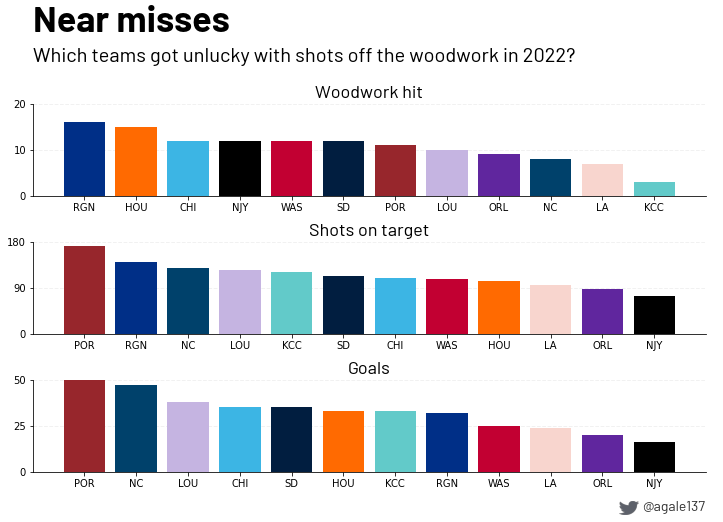

In [15]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 7)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(4, 1, height_ratios=[1, 5, 5, 5])
fig.patch.set_facecolor("white")


def plot_metric(ax, m):
    data = df.sort_values(m, ascending = False)
    
    # Plot data
    ax.bar(data["team_abbreviation"], data[m], color=[NWSL.color(team) for team in data["team_abbreviation"]])

    # Title
    ax.set_title(
        m.replace("_", " ").capitalize(),
        fontproperties=Fonts.BARLOW,
        size=18,
    )

    # Ticks and axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.set_xlim(df_group["dob_" + m].min() - 0.5, df_group["dob_" + m].max() + 0.5)
    ymax = math.ceil(data[m].max() / 10) * 10
    ax.set_ylim(0, ymax)
    ax.set_yticks([0, ymax / 2, ymax])
    
    ax.set_axisbelow(True)
    ax.grid(which="both", axis="y", ls="--", color="#F1F1F1", linewidth=1)


# Plot each metric
plot_metric(axs[1], "woodwork_hit")
plot_metric(axs[2], "shots_on_target")
plot_metric(axs[3], "goals")

# Title
axs[0].axis("off")
axs[0].set_title(
    "Near misses", fontproperties=Fonts.BARLOW_BOLD, size=36, ha="left", x=0, y=1.1
)

# Subtitle
axs[0].text(
    0,
    -0.2,
    "Which teams got unlucky with shots off the woodwork in 2022?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
    transform=axs[0].transAxes,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.86, y=-0.03, fs=14, w=0.03)

# Proper spacing between subplots
fig.tight_layout()

# Save image
plt.savefig(
    "woodwork.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)